In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt


def argmax (x):
    res = -1.0
    for i in x:
        if abs(i) > res:
            res = abs(i)
    return res

## Добавим исходную функцию и её производную

$f(x) = cos(x)$

$F(x) = sin(x)$


In [2]:
def f(x):
    #return (4*x**3 - 30*x**2 + 10*x + 8)
    #return math.cos(x)
    return np.cos(1/(1+x))*(-(1/(1+x)**2)) 

def F(x):
    #return (x**4 - 10*x**3 + 5*x**2 + 8*x)
    #return math.sin(x)
    return np.sin(1/(1+x))


def for_my_f(x):
    return np.sin(10*x)

## Интерполяция по форме лагранжа

In [3]:
def lagranj_inter (dots):
    def f(x):
        res = 0;
        
        len_arr = np.shape(dots)[1]
        for i in range(0, len_arr):
            pre_res = dots[1,i];
            for j in range(0, len_arr):
                pre_res *= ((x - dots[0,j])/(dots[0,i] - dots[0,j])) if (j != i) else 1;
            res += pre_res
        return res
    return f

## Интерполяция по форме ньютона

In [4]:
def Newton_inter (dots):
    len_arr = np.shape(dots)[1]
    
    def split_summ (j, k):
        if (k == 1):
            return (dots[1,j+1] - dots[1,j])/(dots[0,j+1] - dots[0,j])
        else:
            return (split_summ(j+1, k-1) - split_summ(j, k-1))/(dots[0,j+k] - dots[0,j])
    
    def f(x):
        res = dots[1,0] 
        for i in range(1, len_arr):
            pre_res = split_summ(0,i);
            for j in range(i):
                pre_res *= (x - dots[0,j])
            res += pre_res
        return res
    
    return f
                

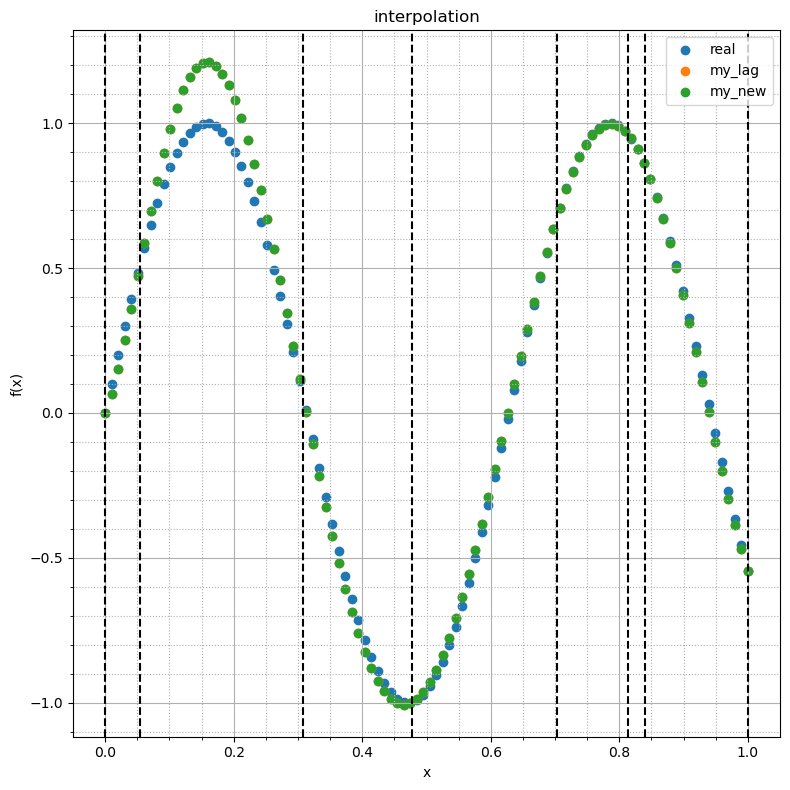

[ 0.00000000e+00 -5.96744876e-16 -7.49400542e-16 -1.49880108e-15
 -1.33226763e-15 -2.05391260e-15 -1.77635684e-15 -2.10942375e-15
 -2.33146835e-15 -2.44249065e-15 -1.22124533e-15  0.00000000e+00
 -1.99840144e-15 -2.22044605e-16 -1.99840144e-15 -1.99840144e-15
 -1.55431223e-15  8.88178420e-16  8.88178420e-16 -8.88178420e-16
 -2.22044605e-16  6.66133815e-16  9.99200722e-16 -3.33066907e-16
 -2.22044605e-16  4.44089210e-16  4.44089210e-16  2.22044605e-16
  3.88578059e-16  1.94289029e-16  4.16333634e-17 -8.67361738e-19
  2.77555756e-17 -3.60822483e-16 -4.44089210e-16 -2.77555756e-16
  0.00000000e+00  0.00000000e+00 -1.11022302e-16 -2.22044605e-16
 -3.33066907e-16 -1.11022302e-15 -2.22044605e-16 -1.11022302e-16
 -6.66133815e-16 -2.22044605e-16 -6.66133815e-16 -4.44089210e-16
 -4.44089210e-16 -4.44089210e-16 -2.22044605e-16 -7.77156117e-16
 -4.44089210e-16 -3.33066907e-16 -3.33066907e-16  0.00000000e+00
  1.11022302e-16  2.77555756e-16  6.10622664e-16 -2.77555756e-16
 -1.94289029e-16  2.35922

In [5]:
rnd_a = np.append(np.append(np.array([0]), np.random.random(6)), np.array([1]))

ans = for_my_f(rnd_a)
a = np.array([rnd_a, ans])

my_f = lagranj_inter(a)
my_f_2 = Newton_inter(a)

num = np.linspace(0, 1, 100)

real_f_arr = for_my_f(num)
my_f_arr = np.array([my_f(x) for x in num])
my_f_2_arr = np.array([my_f_2(x) for x in num])



plt.figure(figsize=(8, 8))
plt.title("interpolation")

real     = plt.scatter(num, real_f_arr , marker='o', label = "real")
my     = plt.scatter(num, my_f_arr     , marker='o', label = "my_lag")
my_2    = plt.scatter(num, my_f_2_arr     , marker='o', label = "my_new")

for i in rnd_a:
    plt.axvline (x=i, color='black', linestyle='--')



plt.legend(handles = [real, my, my_2])

#plt.scatter(h_arr, res_1_22, marker='o')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
# plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

print(my_f_2_arr - my_f_arr)


## Сделаем проектор

In [3]:
def projector (f, h, x_min, x_max):
    x = x_min
    res = np.zeros((2,0))
    while x < x_max:
        res = np.append(res, np.array([x,f(x)]).reshape(2,1), axis = 1)
        x += h
    res = np.append(res, np.array([x_max,f(x_max)]).reshape(2,1), axis = 1)
    return res

## Интеграл по левому прямоугольнику

In [4]:
def left_rect_Int (f, h, x_min, x_max):
    f_arr = projector(f, h, x_min, x_max)
    
    f_arr[0, 1:] = f_arr[0, 1:] - f_arr[0, 0: -1]
    f_arr[1, 1:] = f_arr[1, 1:]*f_arr[0, 1:]; 
    f_arr[1,0] = 0
    
    ans = np.sum(f_arr, axis = 1)[1]
    return ans

## Интеграл по правому прямоугольнику

In [5]:
def right_rect_Int (f, h, x_min, x_max):
    f_arr = projector(f, h, x_min, x_max)
    
    f_arr[0, 0: -1] = f_arr[0, 1:] - f_arr[0, 0: -1]
    f_arr[1, 0: -1] = f_arr[1, 0: -1]*f_arr[0, 0: -1]; 
    f_arr[1,-1] = 0;
    
    ans = np.sum(f_arr, axis = 1)[1]
    return ans

## Интеграл по центральным прямоугольникам

In [13]:
def midle_rect_Int (f, h, x_min, x_max):
    x = x_min
    f_arr = np.zeros((2,0))
    while x + h/2 < x_max:
        f_arr = np.append(f_arr, np.array([x,f(x + h/2)]).reshape(2,1), axis = 1)
        x += h
    f_arr[1,-1] = f((f_arr[0,-1] + x_max)/2)
    f_arr = np.append(f_arr, np.array([x_max,0]).reshape(2,1), axis = 1)
    
    f_arr[0,0:-1] = f_arr[0,1:] - f_arr[0,0:-1]
    
    f_arr[1,0:-1] = f_arr[1,0:-1]*f_arr[0,0:-1]
    
    ans = np.sum(f_arr, axis = 1)[1]
    
    return ans

## Интеграл по формуле стомпсона

In [29]:
def Stomp_Int (f, h_max, x_min, x_max):
    n = int((x_max - x_min)/h_max) + 1
    n = n+1 if (n%2 == 1) else n
    h = (x_max - x_min)/n
    
    f_arr = projector(f, h, x_min, x_max)
    
    summ = 0;
    
    for i in range (1, n+1, 2):
        summ += f_arr[1,i-1] + f_arr[1,i+1] + 4*f_arr[1,i]
    
    ans = summ*h/3
    
    return (ans, h)

## Интеграл по трапециям

In [15]:
def trapezoid_Int (f, h, x_min, x_max):
    f_arr = projector(f, h, x_min, x_max)
    
    f_arr[0,0:-1] = f_arr[0,1:] - f_arr[0,0:-1]
    f_arr[1,0:-1] = (f_arr[1,1:] + f_arr[1,0:-1])/2
    
    f_arr[0,-1] = 0;
    f_arr[1,-1] = 0;
    
    f_arr[1,0:-1] = f_arr[1,0:-1]*f_arr[0,0:-1]
    
    ans = np.sum(f_arr, axis = 1)[1]
    
    return ans

In [16]:
print(F(1) - F(0))
print(left_rect_Int(f, 0.001, 0, 1))
print(right_rect_Int(f, 0.001, 0, 1))
print(midle_rect_Int(f, 0.001, 0, 1))
print(trapezoid_Int(f, 0.001, 0, 1))
print(Stomp_Int(f, 0.001, 0, 1))

-0.3620454462036935
-0.36188499701286825
-0.36220590367826383
-0.36204544413274514
-0.3620454503455661
(-0.3620454462035633, 0.000998003992015968)


## Сгенерируем данные

In [50]:
F_left = np.zeros((1, 0))
F_right = np.zeros((1, 0))
F_midle = np.zeros((1, 0))
F_trapezoid = np.zeros((1, 0))
F_stomp = np.zeros((1, 0))

h_arr = np.zeros((1, 0))
h_stomp_arr = np.zeros((1, 0))

h = 0.0002

F_res = F(1) - F(0)

while h < 0.01:
    F_left      = np.append(F_left,      abs(F_res - left_rect_Int(f, h, 0, 1)))
    F_right     = np.append(F_right,     abs(F_res - right_rect_Int(f, h, 0, 1)))
    F_midle     = np.append(F_midle,     abs(F_res - midle_rect_Int(f, h, 0, 1)))
    F_trapezoid = np.append(F_trapezoid, abs(F_res - trapezoid_Int(f, h, 0, 1)))
    
    h_arr       = np.append(h_arr,       h)
    
    stomp_res = Stomp_Int(f, h, 0, 1)
    
    F_stomp     = np.append(F_stomp,     abs(F_res - stomp_res[0]))
    
    h_stomp_arr = np.append(h_stomp_arr, stomp_res[1])
    
    h = h*1.5
    

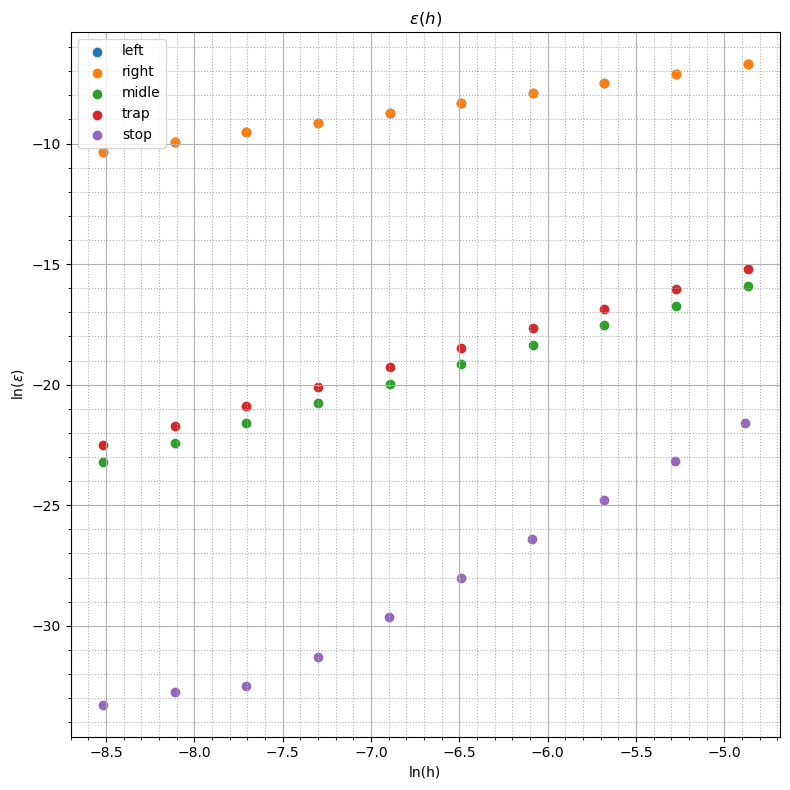

In [51]:
plt.figure(figsize=(8, 8))
plt.title("$\epsilon (h)$")

left      = plt.scatter(np.log(h_arr), np.log(F_left)      , marker='o', label = "left")
right     = plt.scatter(np.log(h_arr), np.log(F_right)     , marker='o', label = "right")
midle     = plt.scatter(np.log(h_arr), np.log(F_midle)     , marker='o', label = "midle")
trapezoid = plt.scatter(np.log(h_arr), np.log(F_trapezoid) , marker='o', label = "trap")
stomp     = plt.scatter(np.log(h_stomp_arr), np.log(F_stomp)     , marker='o', label = "stop")


plt.legend(handles = [left, right, midle, trapezoid, stomp])

#plt.scatter(h_arr, res_1_22, marker='o')

plt.xlabel("ln(h)")
plt.ylabel("ln($\epsilon$)")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
# plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()